In [1]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
#Loading the dataset
data = pd.read_csv("winequality-red.csv")
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
data.shape # To check the number of rows and columns in our dataset

(1599, 12)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [5]:
data.quality.value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

<AxesSubplot:xlabel='quality', ylabel='count'>

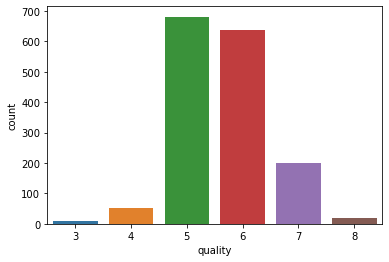

In [6]:
sns.countplot(x= 'quality', data = data)

In [7]:
data.isna().sum()   #(There is no null value)

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [8]:
data['quality'].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [9]:
data['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [10]:
# Binarisation of quality into 1 for >=7 and 0 for < 7
data['quality'] = [1 if x >= 7 else 0 for x in data['quality']]

<AxesSubplot:xlabel='quality', ylabel='count'>

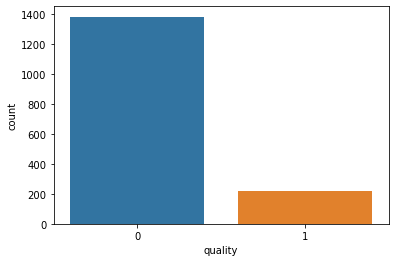

In [11]:
sns.countplot(x= 'quality', data = data)

In [12]:
data['quality'].value_counts() # Here as we can see in target variable the data is imbalanced

0    1382
1     217
Name: quality, dtype: int64

In [13]:
data_correlation = data.corr()

In [154]:
data_correlation

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.120061
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.270712
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.214716
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.047779
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.097308
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.071747
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.139517
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.150460
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057283
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.199485


<AxesSubplot:>

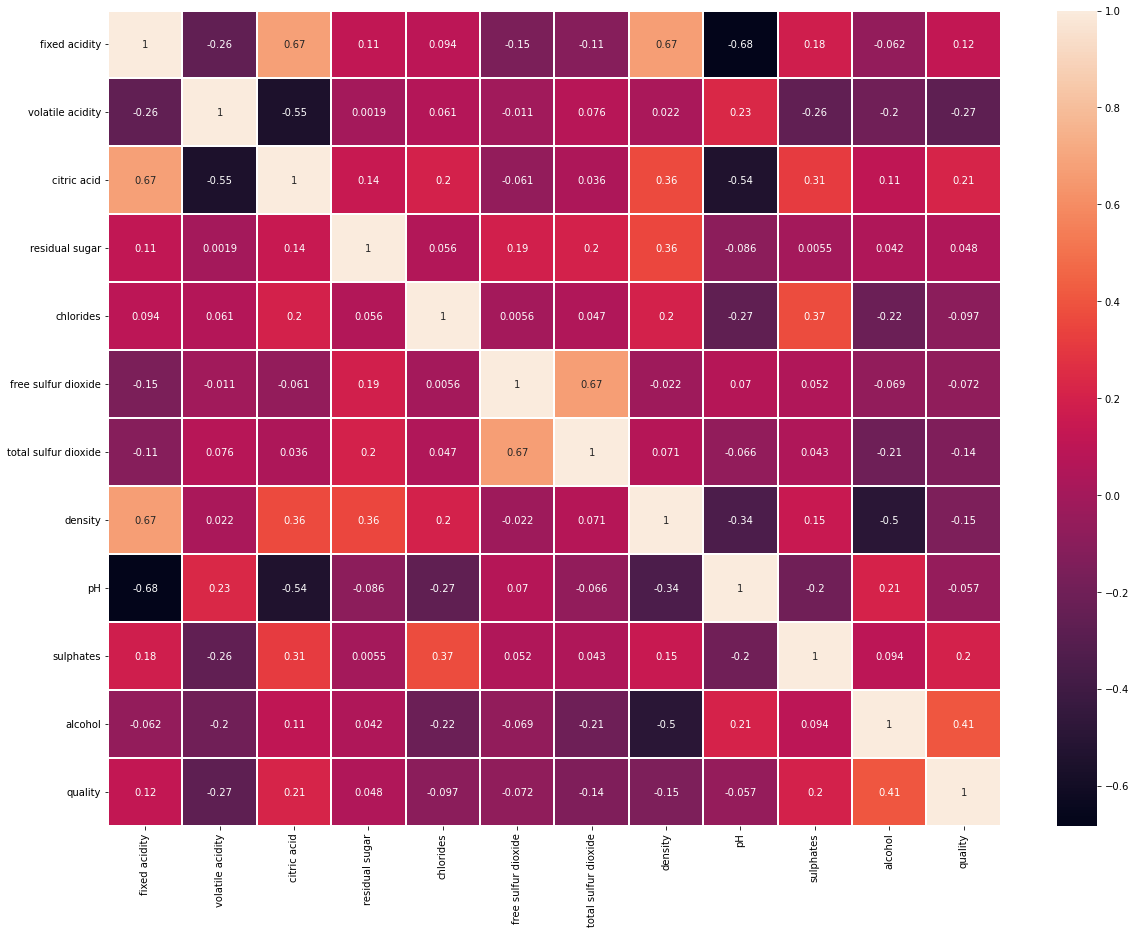

In [14]:
plt.figure(figsize = (20, 15))
sns.heatmap(data = data_correlation, annot = True, linewidth = 0.10)  # no such correlation present as per the heat map

In [15]:
data_correlation['quality'].sort_values(ascending = False)

quality                 1.000000
alcohol                 0.407315
citric acid             0.214716
sulphates               0.199485
fixed acidity           0.120061
residual sugar          0.047779
pH                     -0.057283
free sulfur dioxide    -0.071747
chlorides              -0.097308
total sulfur dioxide   -0.139517
density                -0.150460
volatile acidity       -0.270712
Name: quality, dtype: float64

In [16]:
# separating the features and target variable

x = data.drop(columns = ['quality'])
y = data['quality']

In [17]:
# Now balance our dataset 
from imblearn.over_sampling import SMOTE

In [18]:
SM = SMOTE()
x, y = SM.fit_resample(x,y)

In [19]:
y.value_counts()

0    1382
1    1382
Name: quality, dtype: int64

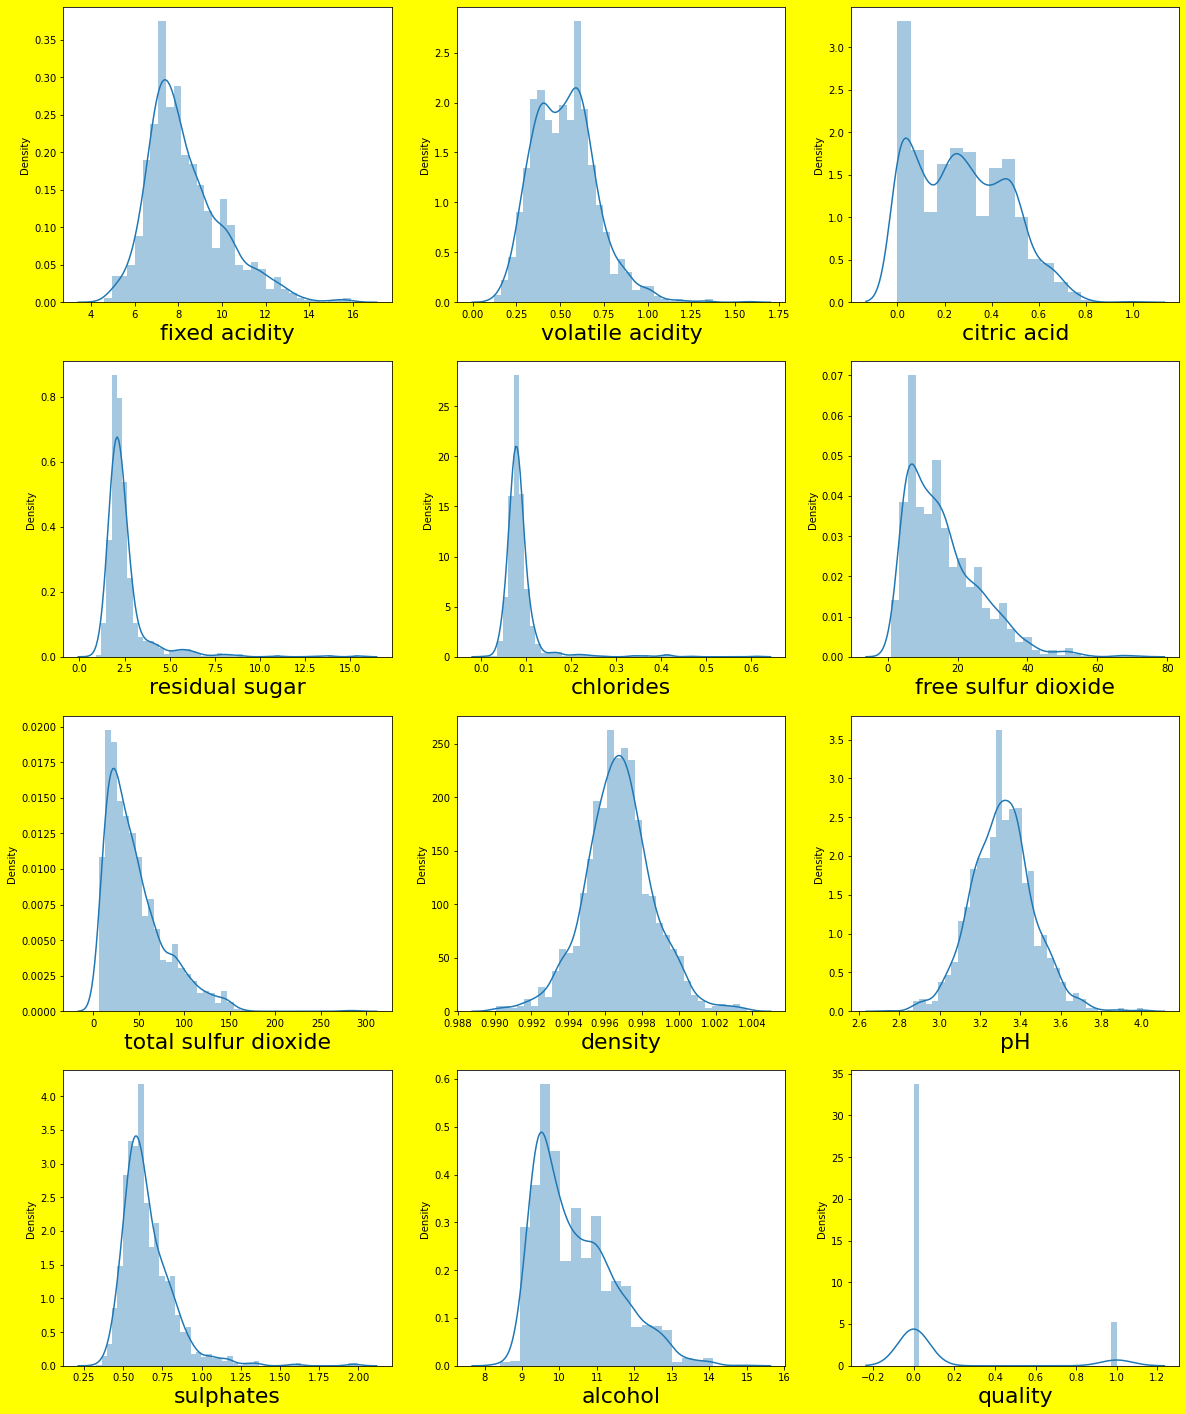

In [20]:
#Normal distribution plot
plt.figure(figsize = (20,25), facecolor = 'yellow')
plotnumber = 1

for column in data:
    if plotnumber <=12:
        ax = plt.subplot(4, 3, plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column, fontsize = 22)
        
    plotnumber +=1
plt.show()

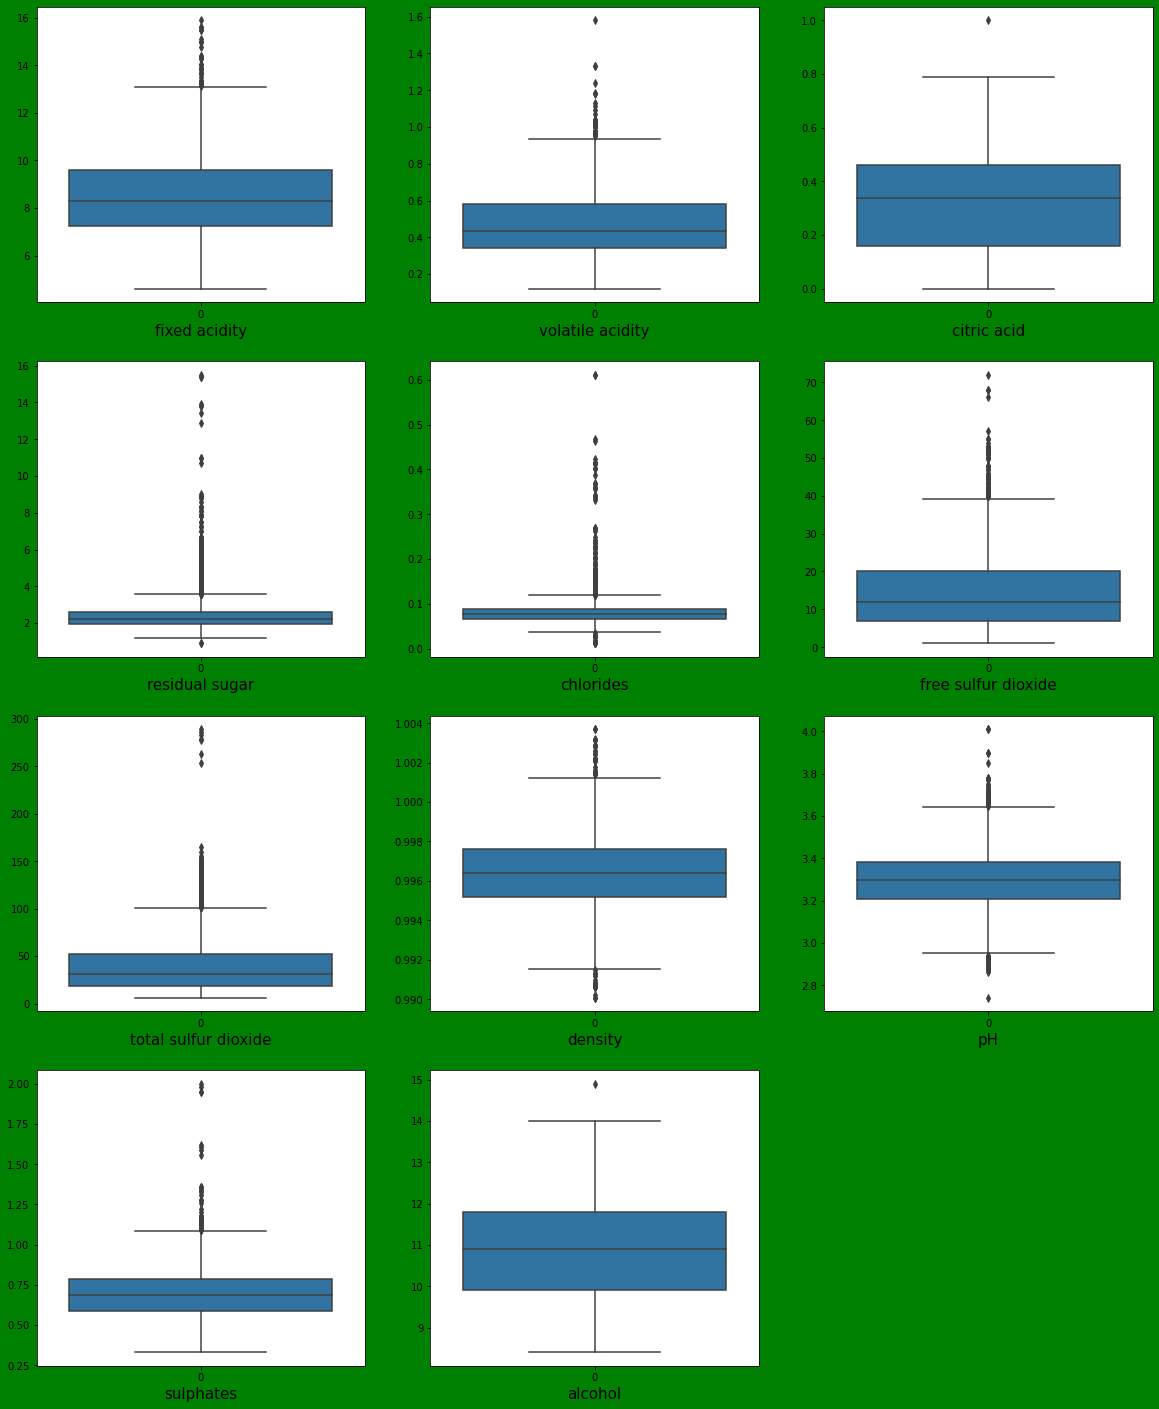

In [21]:
# box plotting to check outliers
plt.figure(figsize = (20, 25), facecolor = 'green')
graph = 1

for column in x:
    if graph <=12:
        plt.subplot(4, 3, graph)
        ax = sns.boxplot(data = x[column])
        plt.xlabel(column, fontsize = 15)
        
    graph +=1
plt.show()

In [22]:
data.skew() # to chekc the skewness

fixed acidity           0.982751
volatile acidity        0.671593
citric acid             0.318337
residual sugar          4.540655
chlorides               5.680347
free sulfur dioxide     1.250567
total sulfur dioxide    1.515531
density                 0.071288
pH                      0.193683
sulphates               2.428672
alcohol                 0.860829
quality                 2.129363
dtype: float64

In [25]:
# To remove the outliers present in our dataset
from scipy.stats import zscore
import numpy as np

In [26]:
z = np.abs(zscore(data))
print(z)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0          0.528360          0.961877     1.391472        0.453218   0.243707   
1          0.298547          1.967442     1.391472        0.043416   0.223875   
2          0.298547          1.297065     1.186070        0.169427   0.096353   
3          1.654856          1.384443     1.484154        0.453218   0.264960   
4          0.528360          0.961877     1.391472        0.453218   0.243707   
...             ...               ...          ...             ...        ...   
1594       1.217796          0.403229     0.980669        0.382271   0.053845   
1595       1.390155          0.123905     0.877968        0.240375   0.541259   
1596       1.160343          0.099554     0.723916        0.169427   0.243707   
1597       1.390155          0.654620     0.775267        0.382271   0.264960   
1598       1.332702          1.216849     1.021999        0.752894   0.434990   

      free sulfur dioxide  

In [27]:
z.shape

(1599, 12)

In [28]:
type(z)

pandas.core.frame.DataFrame

In [29]:
np.where(z>3)

(array([  13,   14,   15,   15,   17,   17,   19,   33,   38,   42,   43,
          45,   57,   81,   81,   83,   86,   88,   91,   92,   95,  106,
         106,  109,  120,  126,  127,  142,  144,  147,  151,  151,  151,
         151,  163,  164,  169,  169,  181,  199,  226,  226,  240,  243,
         244,  258,  258,  274,  281,  291,  324,  325,  339,  340,  347,
         354,  374,  381,  391,  396,  396,  400,  400,  442,  442,  451,
         467,  480,  480,  494,  515,  544,  554,  554,  555,  555,  557,
         557,  568,  584,  588,  591,  595,  608,  614,  636,  639,  649,
         649,  651,  652,  652,  652,  672,  672,  684,  690,  692,  692,
         695,  723,  724,  730,  754,  776,  777,  795,  821,  836,  837,
         889,  911,  917,  923,  925,  926,  982, 1017, 1018, 1043, 1051,
        1051, 1071, 1074, 1079, 1079, 1081, 1081, 1111, 1114, 1131, 1154,
        1165, 1175, 1186, 1231, 1235, 1244, 1244, 1244, 1260, 1269, 1269,
        1270, 1270, 1288, 1289, 1295, 

In [30]:
z.iloc[13]

fixed acidity           0.298547
volatile acidity        0.459094
citric acid             0.097691
residual sugar          0.666062
chlorides               0.563935
free sulfur dioxide     0.657454
total sulfur dioxide    0.531178
density                 0.346269
pH                      0.331177
sulphates               5.322101
alcohol                 1.241848
quality                 0.396256
Name: 13, dtype: float64

In [31]:
len(np.where(z>3)[0])

182

In [32]:
d_new = data[(z<2.5).all(axis = 1)]

In [33]:
d_new.shape

(1167, 12)

In [34]:
data.shape[0] - d_new.shape[0] # to check total loss of our data

432

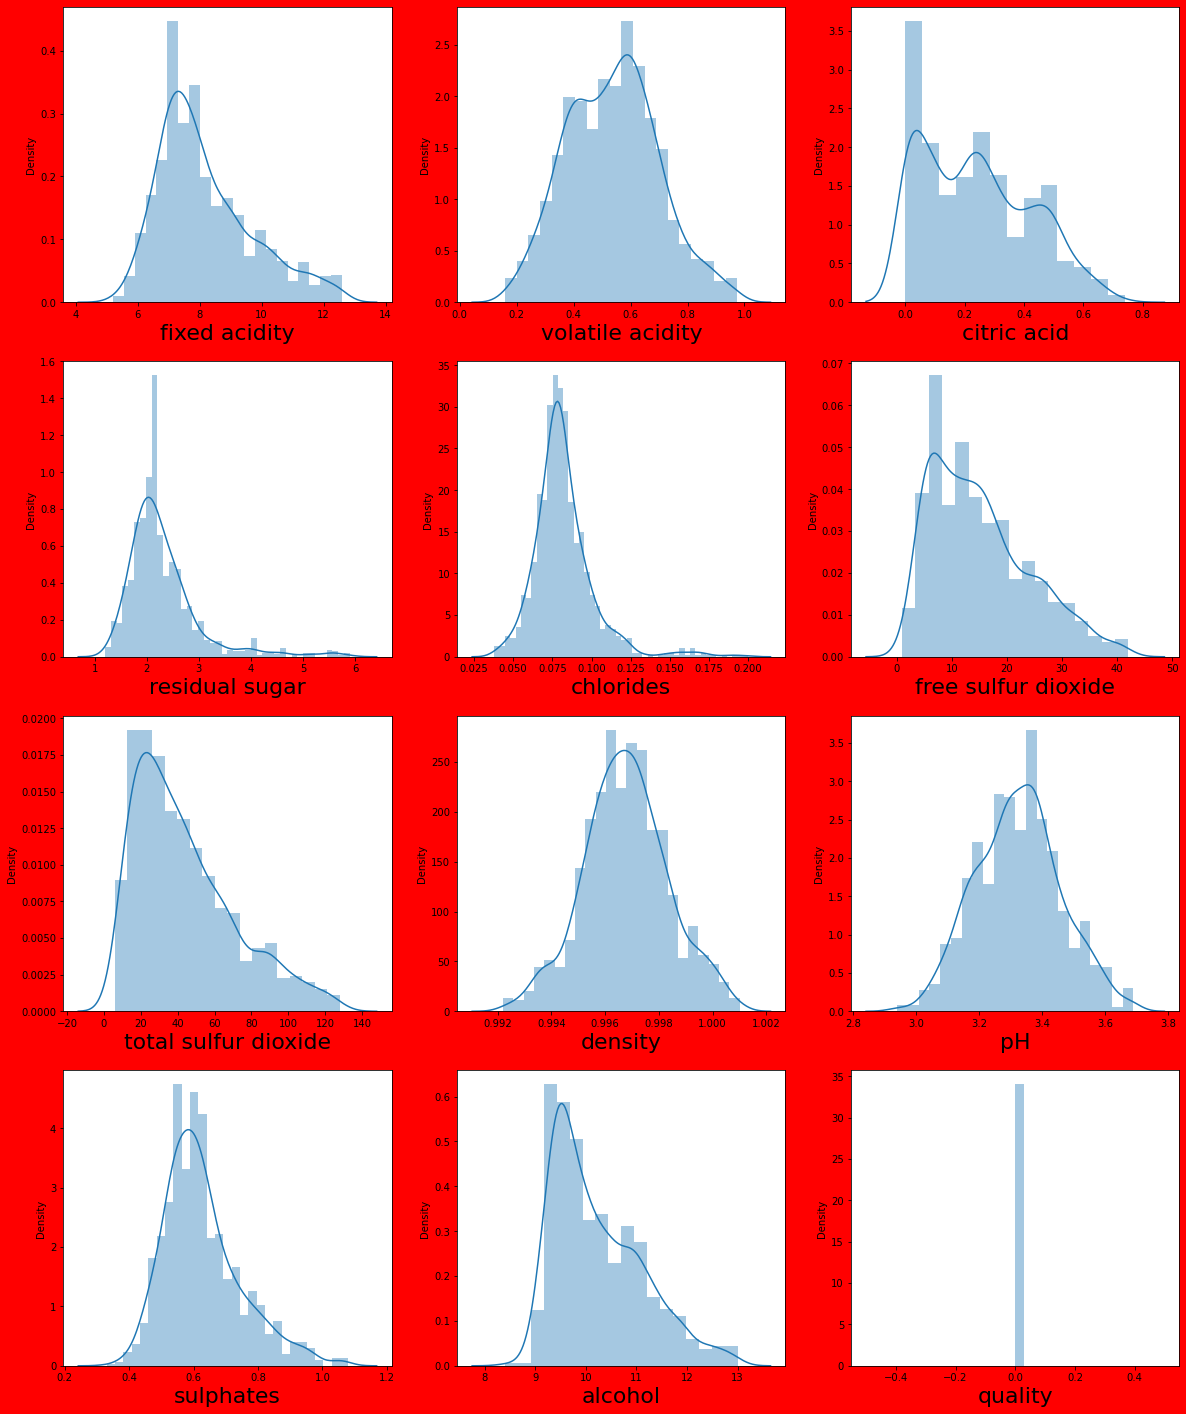

In [35]:
# now lets againg plot the distribution plot

plt.figure(figsize = (20,25), facecolor = 'red')
plotnumber = 1

for column in d_new:
    if plotnumber <=12:
        ax = plt.subplot(4, 3, plotnumber)
        sns.distplot(d_new[column])
        plt.xlabel(column, fontsize = 22)
        
    plotnumber +=1
plt.show()

In [36]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [37]:
# abschecking multi-collinearity

scaler = StandardScaler()
X_scaled = scaler.fit_transform(x)

In [38]:
X_scaled.shape

(2764, 11)

In [39]:
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(X_scaled, i) for i in range(X_scaled.shape[1])]
vif['FEATURES'] = x.columns
vif

,VIF,FEATURES
0,8.606255,fixed acidity
1,2.077792,volatile acidity
2,3.782107,citric acid
3,1.720752,residual sugar
4,1.417038,chlorides
5,1.946103,free sulfur dioxide
6,2.159705,total sulfur dioxide
7,7.411033,density
8,3.700172,pH
9,1.437058,sulphates


In [ ]:
# No multi colinearity exists so we can proceed further for model training

In [41]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 494)

In [42]:
# Now lets train the model using deceision tree classifier
clf = DecisionTreeClassifier()
clf.fit(x_train, y_train)

DecisionTreeClassifier()

In [43]:
clf.score(x_train, y_train)

1.0

In [44]:
y_pred = clf.predict(x_test)
accuracy_score(y_test, y_pred)

0.8784370477568741

In [45]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.8784370477568741

In [46]:
conf_mat = confusion_matrix(y_test, y_pred)
conf_mat

array([[306,  49],
       [ 35, 301]], dtype=int64)

In [47]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.86      0.88       355
           1       0.86      0.90      0.88       336

    accuracy                           0.88       691
   macro avg       0.88      0.88      0.88       691
weighted avg       0.88      0.88      0.88       691



In [50]:
#Now lets tune it
grid_param = {
    'criterion':['gini', 'entropy'],
    'max_depth': range(5, 50),
    'min_samples_leaf':range(2, 8),
    'min_samples_split':range(2, 8),
    'max_leaf_nodes': range(2, 8)
}

In [51]:
grid_search = GridSearchCV(estimator = clf, param_grid = grid_param, cv = 5, n_jobs = -2)

In [52]:
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-2,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(5, 50),
                         'max_leaf_nodes': range(2, 8),
                         'min_samples_leaf': range(2, 8),
                         'min_samples_split': range(2, 8)})

In [53]:
best_parameters = grid_search.best_params_
print(best_parameters)

{'criterion': 'entropy', 'max_depth': 5, 'max_leaf_nodes': 3, 'min_samples_leaf': 2, 'min_samples_split': 2}


In [79]:
# Now check the accuracy using the tunned parameters

clf = DecisionTreeClassifier(criterion= 'entropy', max_depth = 55, min_samples_split = 5, min_samples_leaf = 5, max_leaf_nodes = 45)
clf.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=55, max_leaf_nodes=45,
                       min_samples_leaf=5, min_samples_split=5)

In [80]:
y_pred = clf.predict(x_test)
accuracy_score(y_test, y_pred)

0.8712011577424024

In [82]:
conf_mat = confusion_matrix(y_test, y_pred)

print('\n confusion matrix = ', '\n', conf_mat)

print('\n Accuracy Report', '\n', accuracy_score(y_test, y_pred)*100)


 confusion matrix =  
 [[296  59]
 [ 30 306]]

 Accuracy Report 
 87.12011577424023


In [83]:
fpr, tpr, thresolds = roc_curve(y_test, y_pred)

In [84]:
print('False positive rate is :- ', fpr)
print('True positive rate is :- ', tpr)
print('Thresolds', thresolds)

False positive rate is :-  [0.         0.16619718 1.        ]
True positive rate is :-  [0.         0.91071429 1.        ]
Thresolds [2 1 0]


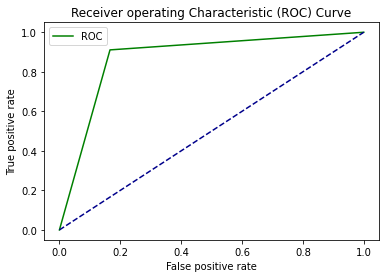

In [85]:
plt.plot(fpr, tpr, color = 'green', label = 'ROC')
plt.plot([0, 1], [0, 1], color = 'darkblue', linestyle = '--')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Receiver operating Characteristic (ROC) Curve')
plt.legend()
plt.show()